# GIS5572-LAB1.2(fiona)

### Create feature

In [27]:
import fiona
from shapely.geometry import LineString, Polygon
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd

In [19]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Define the coordinates
point_coords = [(-93.2432978030554, 44.9720771737284),
                (-93.2354298571532, 44.9734399517614)]

line_coords = [(-93.2432978030554, 44.9720771737284),
               (-93.2354298571532, 44.9734399517614)]

polygon_coords = [(-93.2432978030554, 44.9720771737284),
                  (-93.25324747652463, 45.06680869398418),
                  (-93.18556380476504, 44.985945669616754),
                  (-93.2354298571532, 44.9734399517614)]

In [25]:
import os
import fiona

# Define the directory path
output_directory = "Feature Class"

# Create the directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define the complete paths to the output shapefiles
# Point
output_point_shapefile = os.path.join(output_directory, "FeatureClass_Point.shp")

# Polyline
output_line_shapefile = os.path.join(output_directory, "FeatureClass_Line.shp")

# Polygon
output_polygon_shapefile = os.path.join(output_directory, "FeatureClass_Polygon.shp")

# Define the geometry types
geometry_type_point = 'Point'
geometry_type_line = 'LineString'
geometry_type_polygon = 'Polygon'

# Create feature classes
with fiona.open(output_point_shapefile, 'w', 'ESRI Shapefile', schema={'geometry': geometry_type_point}) as output_point:
    pass  

with fiona.open(output_line_shapefile, 'w', 'ESRI Shapefile', schema={'geometry': geometry_type_line}) as output_line:
    pass  

with fiona.open(output_polygon_shapefile, 'w', 'ESRI Shapefile', schema={'geometry': geometry_type_polygon}) as output_polygon:
    pass  


### Adding points to feature class point

In [29]:
import os
import fiona
from shapely.geometry import mapping, Point

# Define the directory path
output_directory = "Feature Class"

# Create the directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define the complete paths to the output shapefiles
# Point
output_point_shapefile = os.path.join(output_directory, "FeatureClass_Point.shp")

# Define the geometry types
geometry_type_point = 'Point'

# Create two sample points
point1 = Point(1, 1)
point2 = Point(2, 2)

# Open the existing shapefile
with fiona.open(output_point_shapefile, 'a') as output:
    output.write({'geometry': mapping(point1), 'properties': {}})
    output.write({'geometry': mapping(point2), 'properties': {}})


### add line to feature class

In [30]:
#Path to Shapefile
output_line_shapefile = r"Feature Class/FeatureClass_Line.shp"

# Line
line = LineString([(-93.22456694058349, 44.97656707355932),
                   (-93.25750208433475, 44.97369530667097)])

# Open the existing shapefile with Fiona
with fiona.open(output_line_shapefile, 'a') as output:
    output.write({'geometry': mapping(line), 'properties': {}})

### app polygon to feature class

In [31]:
#Path to Shapefile
output_polygon_shapefile = r"Feature Class/FeatureClass_Polygon.shp"

# Polygon
polygon = Polygon([( -93.22456694058349, 44.97656707355932),
                   (-93.25750208433475, 44.97369530667097),
                   (-93.21775917100368, 44.884844671870496),
                   (-93.09021376922068, 44.95341865709891)])

# Open the existing shapefile with Fiona
with fiona.open(output_polygon_shapefile, 'a') as output:
    output.write({'geometry': mapping(polygon), 'properties': {}})

### view row

In [32]:
# Path to all the shapefiles
output_point_shapefile = r"Feature Class/FeatureClass_Point.shp"
output_line_shapefile = r"Feature Class/FeatureClass_Line.shp"
output_polygon_shapefile = r"Feature Class/FeatureClass_Polygon.shp"

# List of shapefiles
shapefiles = [output_point_shapefile, output_line_shapefile, output_polygon_shapefile]

# Iterate through each shapefile
for output_shapefile in shapefiles:
    print(f"\nAttribute Table for {output_shapefile}:")
    with fiona.open(output_shapefile, 'r') as source:
        # Iterate through each feature (row) in the shapefile
        for feature in source:
            # Access the properties (attributes) of the feature
            attributes = feature['properties']
            print(attributes)


Attribute Table for Feature Class/FeatureClass_Point.shp:
OrderedDict([('FID', 0)])
OrderedDict([('FID', 1)])

Attribute Table for Feature Class/FeatureClass_Line.shp:
OrderedDict([('FID', 0)])

Attribute Table for Feature Class/FeatureClass_Polygon.shp:
OrderedDict([('FID', 0)])


### View geometry

In [34]:
import os
import fiona
from shapely.geometry import shape

# Path to all the shapefiles
output_point_shapefile = r"Feature Class/FeatureClass_Point.shp"
output_line_shapefile = r"Feature Class/FeatureClass_Line.shp"
output_polygon_shapefile = r"Feature Class/FeatureClass_Polygon.shp"

# List of shapefiles
shapefiles = [output_point_shapefile, output_line_shapefile, output_polygon_shapefile]

# Iterate through each shapefile
for output_shapefile in shapefiles:
    print(f"\nGeometry Objects for {output_shapefile}:")
    with fiona.open(output_shapefile, 'r') as source:
        # Iterate through each feature (row) in the shapefile
        for feature in source:
            # Access the geometry of the feature
            geometry = shape(feature['geometry'])
            print(geometry)



Geometry Objects for Feature Class/FeatureClass_Point.shp:
POINT (1 1)
POINT (2 2)

Geometry Objects for Feature Class/FeatureClass_Line.shp:
LINESTRING (-93.22456694058349 44.97656707355932, -93.25750208433475 44.97369530667097)

Geometry Objects for Feature Class/FeatureClass_Polygon.shp:
POLYGON ((-93.22456694058349 44.97656707355932, -93.09021376922068 44.95341865709891, -93.21775917100368 44.884844671870496, -93.25750208433475 44.97369530667097, -93.22456694058349 44.97656707355932))


### summarize the content

In [35]:
from collections import defaultdict

# Path to all the shapefiles
output_point_shapefile = r"Feature Class/FeatureClass_Point.shp"
output_line_shapefile = r"Feature Class/FeatureClass_Line.shp"
output_polygon_shapefile = r"Feature Class/FeatureClass_Polygon.shp"

# List of shapefiles
shapefiles = [output_point_shapefile, output_line_shapefile, output_polygon_shapefile]

# Dictionary to store geometry type counts
geometry_counts = defaultdict(int)

# Iterate through each shapefile
for output_shapefile in shapefiles:
    with fiona.open(output_shapefile, 'r') as source:
        # Iterate through each feature (row) in the shapefile
        for feature in source:
            # Access the geometry type of the feature
            geometry_type = shape(feature['geometry']).type
            # Increment the count for the geometry type
            geometry_counts[geometry_type] += 1

# Print the summary information
print("\nSummary of Geometry Types:")
for geometry_type, count in geometry_counts.items():
    print(f"{geometry_type.capitalize()} Count: {count}")


Summary of Geometry Types:
Point Count: 2
Linestring Count: 1
Polygon Count: 1


### Add points into feature classes

In [11]:
# Convert coordinates to Shapely geometries
point = Point(point_coords)
line = LineString(line_coords)
polygon = Polygon(polygon_coords)

# Define the coordinates
point_coords = [(-93.2432978030554, 44.9720771737284),
                (-93.2354298571532, 44.9734399517614)]

# Define the coordinates for the line
line_coords = [(-93.2432978030554, 44.9720771737284),
               (-93.2354298571532, 44.9734399517614)]

# Define the coordinates for the polygon
polygon_coords = [(-93.2432978030554, 44.9720771737284),
                  (-93.25324747652463, 45.06680869398418),
                  (-93.18556380476504, 44.985945669616754),
                  (-93.2354298571532, 44.9734399517614)]


# Convert coordinates to Shapely geometry
point = Point(point_coords[0])
line = LineString(line_coords)
polygon = Polygon(polygon_coords)

In [11]:
# Define schema for the shapefile
schema = {'geometry': 'Point', 'properties': {'id': 'int'}}

line_schema = {'geometry': 'LineString', 'properties': {'id': 'int'}}

polygon_schema = {'geometry': 'Polygon', 'properties': {'id': 'int'}}


# Write the feature to a shapefile using Fiona
with fiona.open('point_shapefile.shp', 'w', 'ESRI Shapefile', schema) as file:
    file.write({'geometry': {'type': 'Point', 'coordinates': point_coords[0]}, 'properties': {'id': 1}})

# Write the line feature to a shapefile using Fiona
with fiona.open('line_shapefile.shp', 'w', 'ESRI Shapefile', line_schema) as file:
    file.write({'geometry': {'type': 'LineString', 'coordinates': line_coords}, 'properties': {'id': 1}})

# Write the polygon feature to a shapefile using Fiona
with fiona.open('polygon_shapefile.shp', 'w', 'ESRI Shapefile', polygon_schema) as file:
    file.write({'geometry': {'type': 'Polygon', 'coordinates': [polygon_coords]}, 'properties': {'id': 1}})

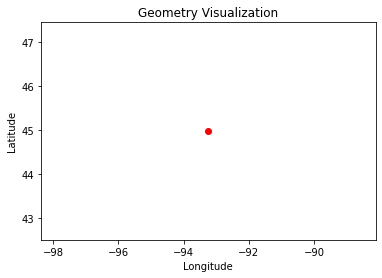

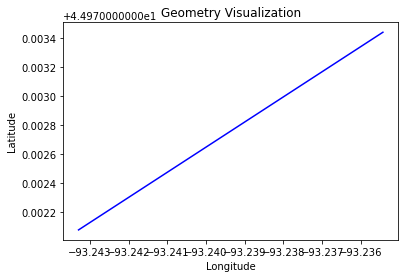

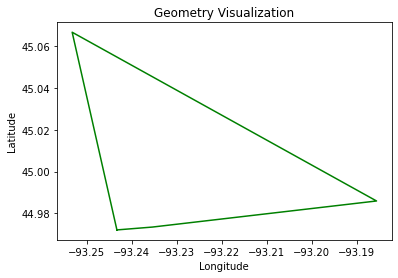

In [12]:
# Read the shapefile and visualize the geometries using Matplotlib
def plot_shapefile(shapefile):
    with fiona.open(shapefile) as file:
        for feature in file:
            geometry = feature['geometry']
            if geometry['type'] == 'Point':
                plt.plot(*geometry['coordinates'], 'ro')
            elif geometry['type'] == 'LineString':
                coords = geometry['coordinates']
                plt.plot([point[0] for point in coords], [point[1] for point in coords], 'b-')
            elif geometry['type'] == 'Polygon':
                coords = geometry['coordinates'][0]  # Only the exterior ring
                plt.plot([point[0] for point in coords] + [coords[0][0]], [point[1] for point in coords] + [coords[0][1]], 'g-')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Geometry Visualization')
    plt.show()

plot_shapefile('point_shapefile.shp')
plot_shapefile('line_shapefile.shp')
plot_shapefile('polygon_shapefile.shp')

In [16]:
!pip install gdal

In [17]:
import ogr

# Define the paths
shapefiles = ["point_shapefile.shp", "line_shapefile.shp", "polygon_shapefile.shp"]
output_gdb = r"C:\Users\Deepika\OneDrive\Documents\ArcGIS\Projects\ArcGIS_II-Lab1.2(arcpy)\ArcGIS_II-Lab1.gdb"

# Open the output geodatabase
driver = ogr.GetDriverByName("OpenFileGDB")
output_ds = driver.CreateDataSource(output_gdb)

# Loop through shapefiles and copy features to the geodatabase
for shapefile in shapefiles:
    # Open the input shapefile
    input_ds = ogr.Open(shapefile)
    layer = input_ds.GetLayer()

    # Create corresponding feature class in the geodatabase
    output_layer = output_ds.CreateLayer(
        layer.GetName(), layer.GetSpatialRef(), layer.GetGeomType())

    # Copy features from input shapefile to the geodatabase
    for feature in layer:
        output_layer.CreateFeature(feature)

    # Clean up
    output_layer = None
    input_ds = None

print("Shapefiles exported to geodatabase successfully.")


ModuleNotFoundError: No module named 'ogr'